# Task 1

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report




df=pd.read_csv("Data Set/Social_Network_Ads.csv")

In [13]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])

In [15]:
df.drop(['User ID'],axis=1,inplace=True)

In [20]:
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values

In [22]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def sigmoid(self, sm):
        return 1/(1+np.exp(-sm))
    def fit(self, X, y):
        number_samples,number_features=X.shape
        self.weights=np.zeros(number_features)
        self.bias=0
        for i in range(self.n_iters):
            linear_model=np.dot(X,self.weights)+self.bias
            y_pred=self.sigmoid(linear_model)
            dw = (1 / number_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / number_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self,X):
        linear_model = np.dot(X, self.weights) + self.bias
        return [1 if i > 0.5 else 0 for i in self.sigmoid(linear_model)]


        
        

In [26]:

model=LogisticRegression(learning_rate=0.1,n_iters=1000)
model.fit(X_train,y_train)

In [27]:
predictions=model.predict(X_test)

In [29]:
print(f"Predictions: {predictions}")

Predictions: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [34]:

print(f"Accuracy : {accuracy_score(y_test,predictions)*100}")

Accuracy : 88.75


In [31]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test,predictions)}")

Confusion Matrix: 
[[50  2]
 [ 7 21]]


In [33]:

print(f"Classification Report: \n{classification_report(y_test,predictions)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



# Task 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv("Data Set/Social_Network_Ads.csv")

In [3]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [5]:
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values

In [6]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [7]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
logistic_reg=LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred=logistic_reg.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



# Task 3

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [20]:
df_data=pd.read_csv("Data Set/Position_Salaries.csv")
df_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [28]:
X=df_data[['Level']].values
y=df_data['Salary'].values

In [29]:
polynomial=PolynomialFeatures(degree=4)
X_poly=polynomial.fit_transform(X)

In [30]:
poly_lr=LinearRegression()
poly_lr.fit(X_poly,y)

LinearRegression()

In [31]:
y_predict=poly_lr.predict(X_poly)

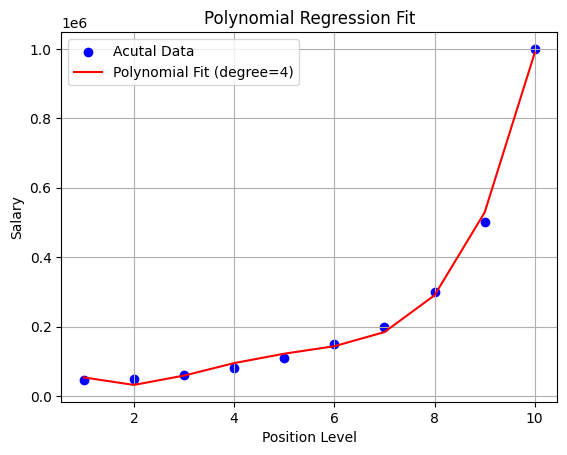

In [34]:
plt.scatter(X,y, color='blue', label="Acutal Data")
plt.plot(X,y_predict,color='red', label="Polynomial Fit (degree=4)")
plt.grid(True)
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()



In [40]:
r2=r2_score(y,y_predict)
print("Polynomial Regression Metric")
print(f"R^2 Score: {r2:.4f}",)

Polynomial Regression Metric
R^2 Score: 0.9974
